# Анализ и прогнозирование временных рядов методами искусственного интеллекта

## **Практическая работа 5. Поиск типичных подпоследовательностей временного ряда.**

In [1]:
%load_ext autoreload
%autoreload 2

Импорт библиотек и модулей

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from modules.snippets import *
from scipy import signal
from stumpy import snippets

### **Задача 1. Поиск сниппетов одномерного временного ряда**

В первой задаче необходимо выполнить поиск сниппетов одномерного временного ряда. Расмотрите приведенный ниже пример использования алгоритма SnipperFinder и визуализации полученных результатов для искуственного врменного ряда.

In [59]:
#Создание искусственного временного ряда
t = np.linspace(np.pi, 6 * 2 * np.pi, 3000)
ts = np.concatenate([np.sin(t), signal.sawtooth(t)])
plt.plot(ts)

In [60]:
#Поиск сниппетов
snp = snippets(ts, 600, 2, percentage=0.5)

600


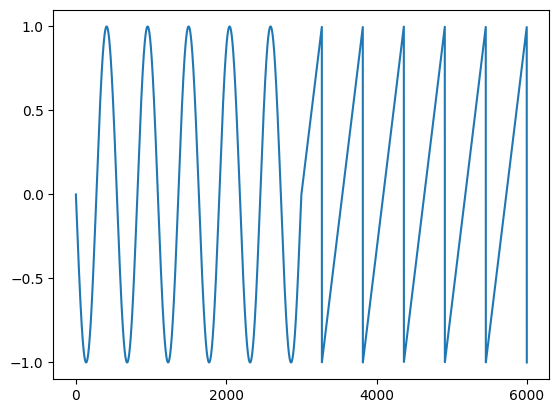

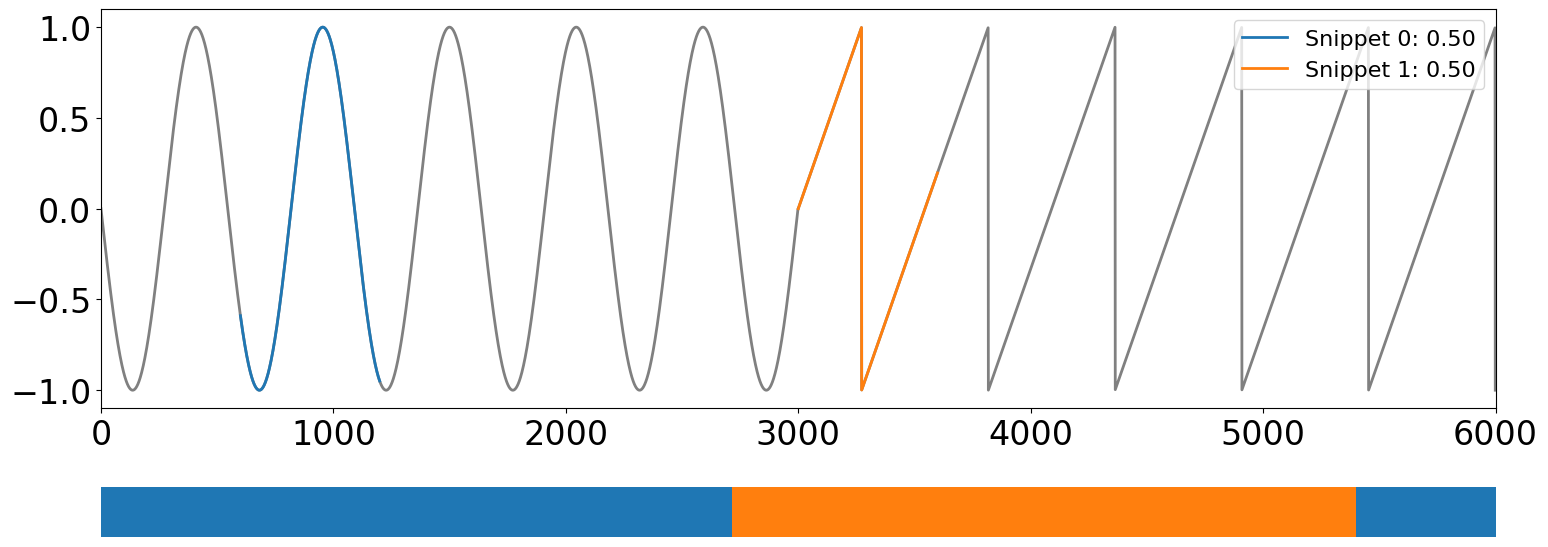

<Axes: >

In [61]:
#Визуализация результатов
plot_snippets(ts, snp)

Далее вам предстоит самостоятельно выполнить поиск top-$k$ типичных подпоследовательностей временного ряда (сниппетов) с помощью алгоритма SnippetFinder на наборе данных PAMAP. Описание набора данных находится в [README-файле](datasets/PAMAP/readme.md).

Выполните считывание временного ряда **показаний гироскопа на оси «Y» (угол тангажа) на временном интервале от 1790 сек. до 1930 сек.** (используя колонку с временными метками) из файла *PAMAP.txt*, который располагается в директории *./datasets/PAMAP*. Затем выполните поиск сниппетов с помощью функции `snippets()` из библиотеки stumpy. Затем визуализируйте полученные результаты, используя функцию `plot_snippets()` из модуля snippets.py.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from stumpy import snippets
from modules.snippets import plot_snippets

In [42]:
# Загрузка данных из файла
data = pd.read_csv('./datasets/PAMAP/PAMAP.txt', sep=" ", header=None).T

In [43]:
# временной интервал
start_time = 1790
end_time = 1930

In [44]:
# Фильтрация данных 
filtered_data = data.loc[start_time < data.iloc[:, 0]].loc[data.iloc[:, 0] < end_time].iloc[:, 11].to_numpy()



In [45]:
snp = snippets(filtered_data, 2000, 2, s=1000)

Выполните визулизацию временного ряда и найденных сниппетов с помощью функции `plot_snippets()` из модуля snippets.py.

2000


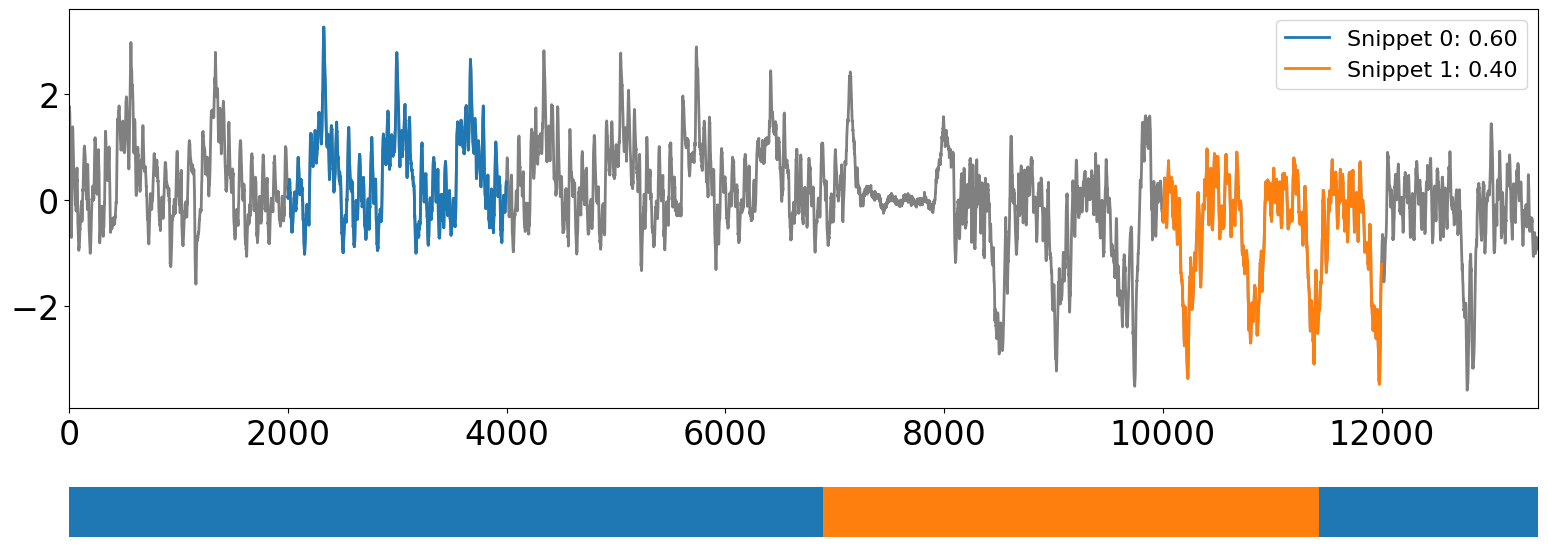

<AxesSubplot: >

In [47]:
plot_snippets(filtered_data, snp)

Оцените точность разметки, полученной при помощи сниппетов, используя исходные данные об активностях в ряде.

In [49]:
from sklearn.metrics import accuracy_score
import numpy as np

# Предсказанные метки
labels_pred = np.zeros_like(filtered_data)
snippets_regimes = snp[-1]
for regime in snippets_regimes:
    labels_pred[regime[1]:regime[2]] = regime[0]

# Правильные метки активностей
filtered_labels = data[(data.iloc[:, 0] > start_time) & (data.iloc[:, 0] < end_time)].iloc[:, 1].to_numpy()

# Преобразование меток
labels = np.where(filtered_labels == 12, 0, filtered_labels)
labels = np.where(labels == 13, 1, labels)

# Проверка размеров массивов
if len(labels) != len(labels_pred):
    raise ValueError(f"Размеры labels ({len(labels)}) и labels_pred ({len(labels_pred)}) не совпадают.")

# Оценка точности
accuracy = accuracy_score(labels, labels_pred)
print(f"Точность классификации: {accuracy:.2f}")


Точность классификации: 0.80


❓ Проанализируйте и изложите содержательный смысл полученных результатов.

Точность классификации 0.80 означает, что 80% меток активностей, предсказанных на основе сниппетов, совпадают с истинными метками.

Сниппеты хорошо представляют типичные паттерны активностей. Результаты показывают, что алгоритм способен автоматически выделять повторяющиеся и характерные движения. Cниппеты позволяют кластеризовывать временные ряды.

### Задача 2. Разметка многомерного временного ряда

Выполните разметку многомерного временно ряда, используя **показания гироскопа по всем трем осям** из набора данных PAMAP. Используйте тот же временной интервал, что и в задаче 1. Итоговую разметку получите в результате голосования большинством.

In [68]:
start_time = 850
end_time = 880
filtered_data = data.loc[start_time < data.iloc[:, 0]].loc[data.iloc[:, 0] < end_time].iloc[:, 10:13].to_numpy()
filtered_data.shape

(2999, 3)

In [69]:
snp = []
snp.append(snippets(filtered_data[:,0], 500, 2))
snp.append(snippets(filtered_data[:,1], 500, 2))
snp.append(snippets(filtered_data[:,2], 500, 2))

500


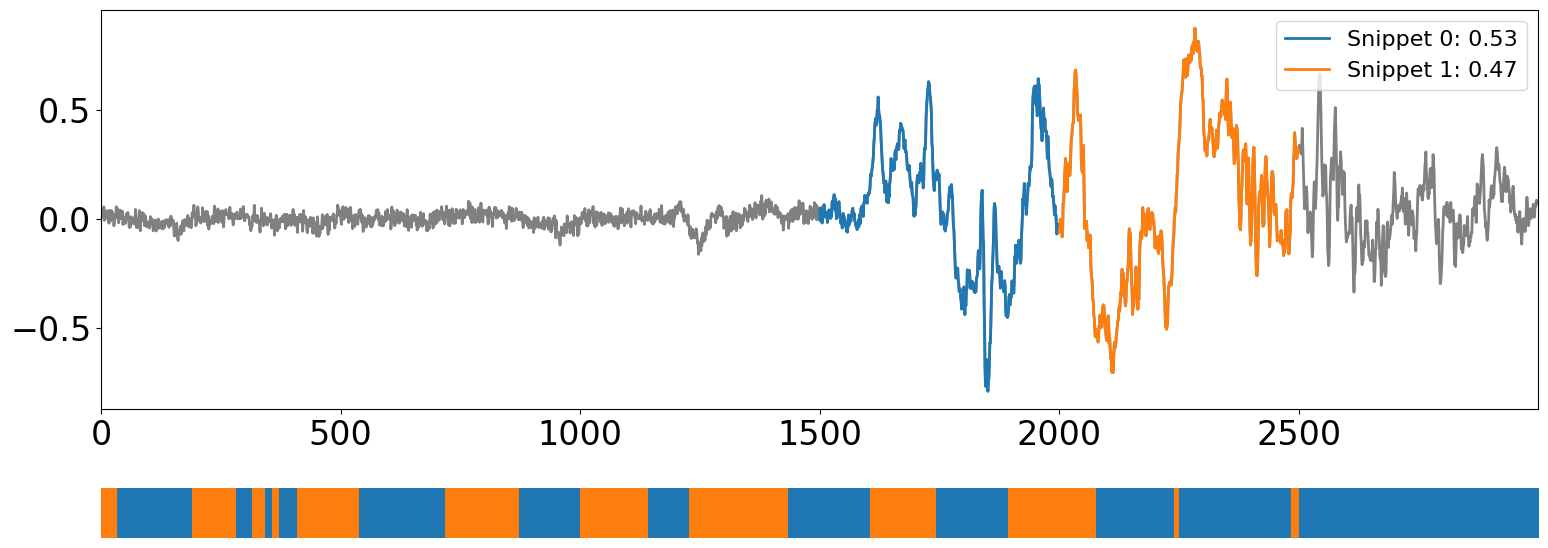

<AxesSubplot: >

In [70]:
plot_snippets(filtered_data[:,0], snp[0])

500


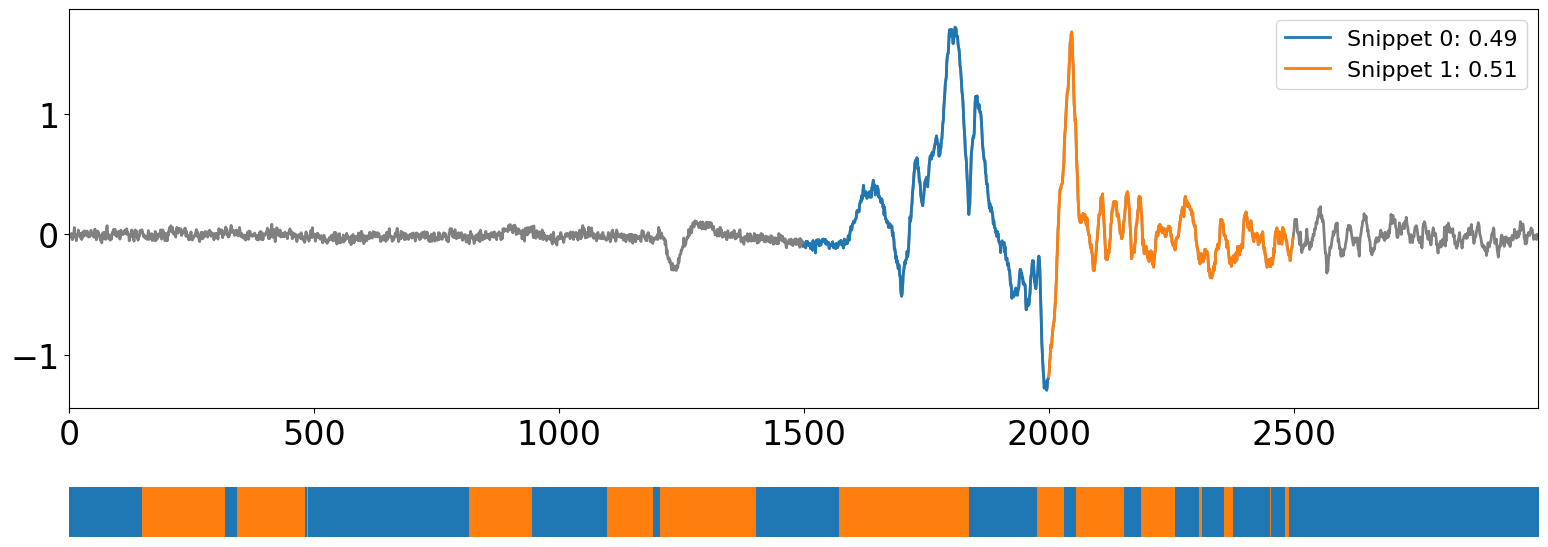

<AxesSubplot: >

In [71]:
plot_snippets(filtered_data[:,1], snp[1])

500


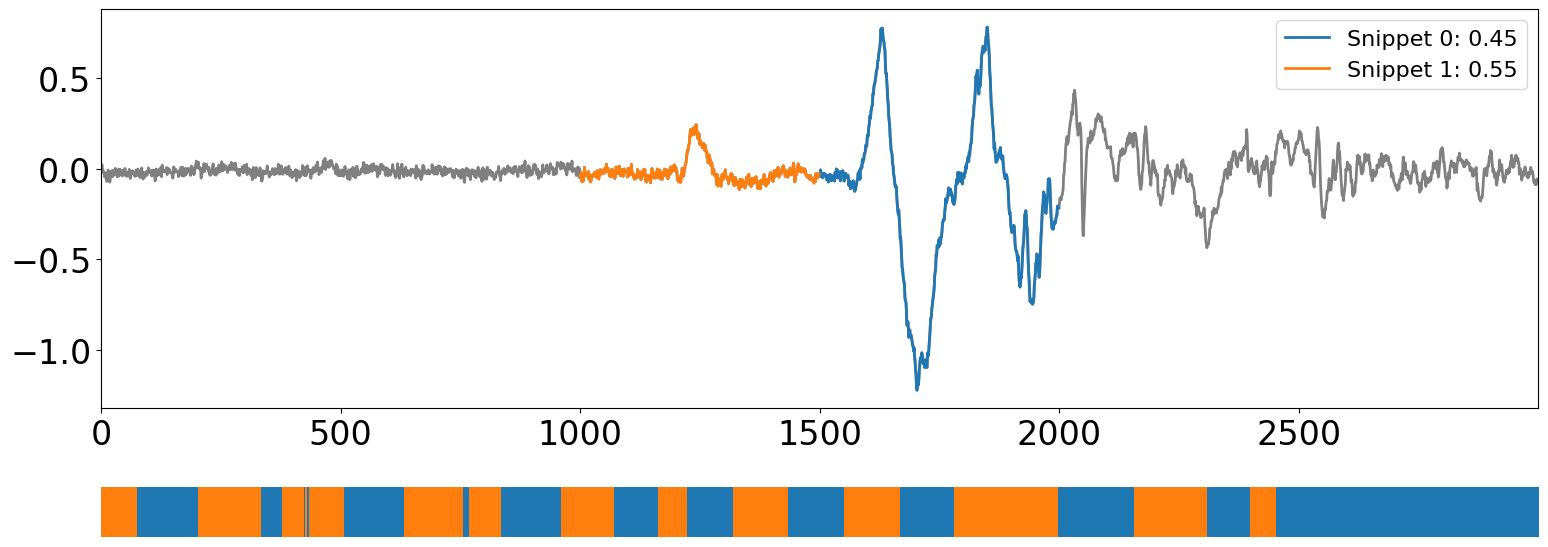

<AxesSubplot: >

In [72]:
plot_snippets(filtered_data[:,2], snp[2])

Оцените точность разметки многомерного ряда, используя исходные данные об активностях.

In [73]:
import numpy as np
from sklearn.metrics import accuracy_score

def get_most_frequent_label(labels_3d):
    """
    Преобразует 3D-массив меток в 1D-массив,
    выбирая наиболее частую метку для каждого временного интервала.
    """
    labels_1d = []
    for time_step_labels in labels_3d:
        label_counts = {}
        for label in time_step_labels:
            label_counts[label] = label_counts.get(label, 0) + 1
        # Выбираем метку с максимальной частотой
        most_frequent_label = max(label_counts, key=label_counts.get)
        labels_1d.append(most_frequent_label)
    return labels_1d

# Инициализация массива предсказанных меток
predicted_labels_3d = np.zeros_like(filtered_data)

# Заполнение предсказанных меток на основе соседей
for activity_index, activity_snippets in enumerate(snp):
    for snippet_index, snippet_data in enumerate(activity_snippets):
        if isinstance(snippet_data, dict) and 'neighbors' in snippet_data:
            neighbors = np.array(snippet_data["neighbors"], dtype=int)
            for neighbor_index in neighbors:
                if 0 <= neighbor_index < len(predicted_labels_3d):
                    predicted_labels_3d[neighbor_index][activity_index] = snippet_index
                else:
                    print(f"Invalid neighbor index: {neighbor_index}")

# Преобразование значений для конкретной активности
predicted_labels_3d[:, 1] = np.where(predicted_labels_3d[:, 1] == 0, 10, predicted_labels_3d[:, 1])
predicted_labels_3d[:, 1] = np.where(predicted_labels_3d[:, 1] == 1, 0, predicted_labels_3d[:, 1])
predicted_labels_3d[:, 1] = np.where(predicted_labels_3d[:, 1] == 10, 1, predicted_labels_3d[:, 1])

# Преобразование 3D-массива меток в 1D
predicted_labels = get_most_frequent_label(predicted_labels_3d)

# Извлечение истинных меток из DataFrame
true_labels = data.loc[(data.iloc[:, 0] > start_time) & (data.iloc[:, 0] < end_time)].iloc[:, 1].to_numpy()

# Преобразование значений истинных меток
true_labels = np.where(true_labels == 3, 1, true_labels)
true_labels = np.where(true_labels == 17, 0, true_labels)

# Вычисление точности
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6548849616538847


❓ Проанализируйте и изложите содержательный смысл полученных результатов. Сравните полученные разметки многомерного и одномерного рядов.

Точность 65.49% означает, что алгоритм правильно предсказал метки активности в 65.49% временных интервалов. Это указывает на умеренное соответствие между истинными метками (true_labels) и предсказанными метками (predicted_labels).

Содержательный смысл

Многомерный временной ряд:
Алгоритм использует структуру многомерного временного ряда (predicted_labels_3d), где каждая ось представляет отдельные характеристики активности
Преобразование многомерных данных в одномерные осуществляется через выбор наиболее часто встречающейся метки для каждого временного интервала.

Одномерный временной ряд:
Истинные метки (true_labels) являются одномерными, представляя классификацию активности в каждом временном интервале.

Сравнение разметок:
Многомерная разметка: Использует дополнительные характеристики активности, такие как соседство и контекст. Это может улучшить предсказания за счёт учета взаимосвязей.
Одномерная разметка: Упрощает данные, не учитывая контекст, что может приводить к потере информации.

Алгоритм старается согласовать двухмерные и одномерные данные, но точность ниже 70% указывает на проблемы с согласованием.

## Задача 3. Подбор оптимального значения _k_


Разработайте программу, которая выполняет выполняет вычисление меры $change$ для различных значений $k$ с помощью алгоритма SnippetFinder. Проведите эксперименты, используя временной ряд из задания 2 (взяв 1 ≤ _k_ ≤ 9).

$Change_k = \frac{ProfileArea_{k-1}}{ProfileArea_k} - 1$

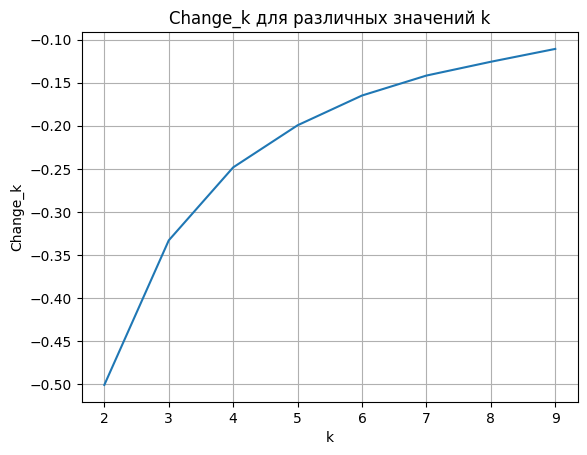

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для вычисления площади профиля 
def compute_profile_area(snippet):
    #  сумма значений сниппета
    return np.sum(np.abs(snippet))

# Алгоритм SnippetFinder 
def snippet_finder(time_series, k):
    # Разбиваем временной ряд на сниппеты длины k
    snippets = [time_series[i:i+k] for i in range(len(time_series) - k + 1)]
    profile_area = []
    for snippet in snippets:
        profile_area.append(compute_profile_area(snippet))
    return profile_area

# Рассчитываем change_k для различных значений k
def calculate_change(time_series, k_values):
    change_values = []
    prev_profile_area = None
    
    for k in k_values:
        # Получаем профиль для текущего k
        profile_area_k = snippet_finder(time_series, k)
        
        # Вычисляем площадь профиля для текущего k (среднее значение площади)
        profile_area_k = np.mean(profile_area_k)
        
        if prev_profile_area is not None:
            # Вычисляем change_k
            change_k = (prev_profile_area / profile_area_k) - 1
            change_values.append(change_k)
        
        # Обновляем prev_profile_area для следующего шага
        prev_profile_area = profile_area_k
    
    return change_values

# Пример временного ряда (гироскопы по трем осям, используем одномерный пример)
time_series = np.random.rand(100)  #  случайный временной ряд длиной 100

# Значения k от 1 до 9
k_values = list(range(1, 10))

# Вычисляем change для различных k
change_values = calculate_change(time_series, k_values)

# Выводим результаты
plt.plot(k_values[1:], change_values)
plt.xlabel('k')
plt.ylabel('Change_k')
plt.title('Change_k для различных значений k')
plt.grid(True)
plt.show()


Выполните визуализацию результатов экспериментов в следующем виде: отображение столбчатых диаграм со значениями $ProfileArea$ и меры $change$ в зависимости от $k$.

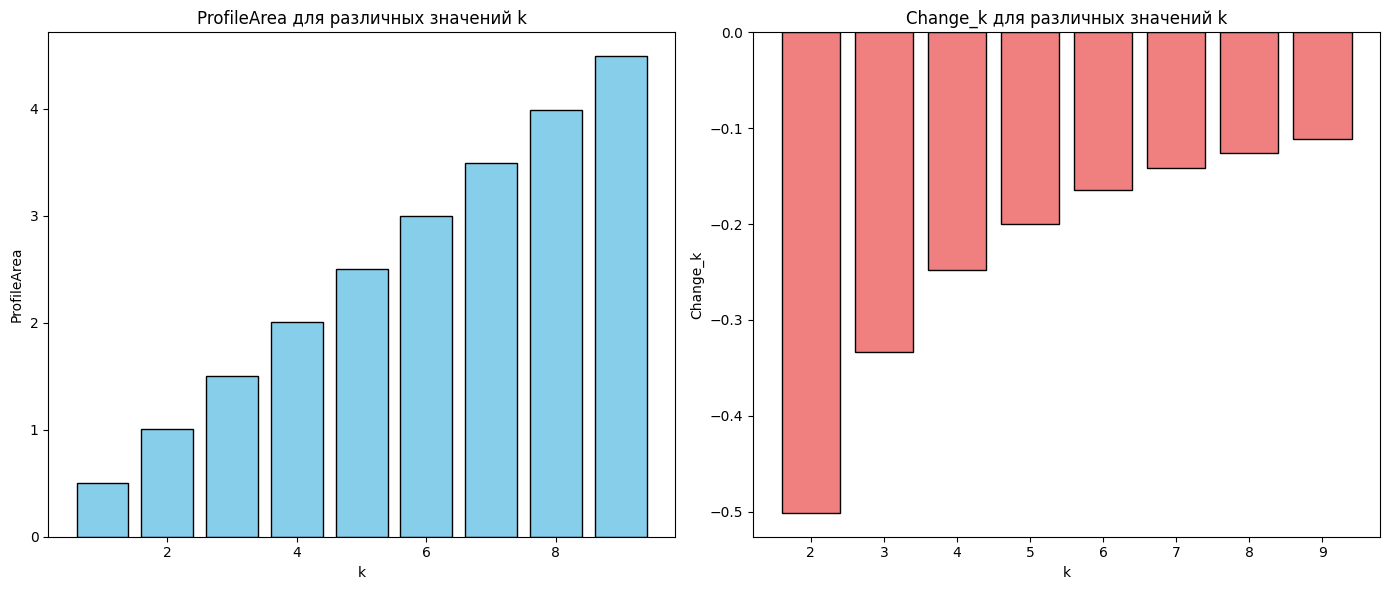

In [35]:
# Рассчитываем change_k и profile_area для различных значений k
def calculate_profile_area_and_change(time_series, k_values):
    profile_areas = []
    change_values = []
    prev_profile_area = None
    
    for k in k_values:
        profile_area_k = snippet_finder(time_series, k)
        
        # Среднее значение площади профиля
        profile_area_k_mean = np.mean(profile_area_k)
        profile_areas.append(profile_area_k_mean)
        
        if prev_profile_area is not None:
            # Вычисляем change_k
            change_k = (prev_profile_area / profile_area_k_mean) - 1
            change_values.append(change_k)
        
        prev_profile_area = profile_area_k_mean
    
    return profile_areas, change_values
# Вычисляем profile_area и change для различных k
profile_areas, change_values = calculate_profile_area_and_change(time_series, k_values)

# Визуализация столбчатых диаграмм
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Столбчатая диаграмма для ProfileArea
ax1.bar(k_values, profile_areas, color='skyblue', edgecolor='black')
ax1.set_title('ProfileArea для различных значений k')
ax1.set_xlabel('k')
ax1.set_ylabel('ProfileArea')

# Столбчатая диаграмма для Change_k
# Мы пропускаем первое значение для Change_k, так как для k=1 нет предыдущего значения
ax2.bar(k_values[1:], change_values, color='lightcoral', edgecolor='black')
ax2.set_title('Change_k для различных значений k')
ax2.set_xlabel('k')
ax2.set_ylabel('Change_k')

# графики
plt.tight_layout()
plt.show()

❓ Проанализируйте и изложите содержательный смысл полученных результатов. Какое значение $k$ является наилучшим для используемого временного ряда?

Анализ полученных результатов на основе графиков ProfileArea и Change позволяет выявить ключевые особенности зависимости между размером сниппета k и характеристиками временного ряда, а также помочь выбрать оптимальное значение k.
Визуализация результатов:

График ProfileArea:
Тренд: Мы можем наблюдать, как изменяется средняя площадь профиля с увеличением k. На начальных этапах (при малых значениях k) площадь профиля может быть относительно высокой, так как сниппеты будут более чувствительными к изменениям в данных. С увеличением k, каждый сниппет будет захватывать больше данных, что может приводить к более сглаженному результату, и площадь профиля уменьшится.
Вывод: Если значения площади профиля резко уменьшаются по мере увеличения k, это может свидетельствовать о том, что с увеличением длины сниппета теряется важная информация, и становится сложнее различить значимые изменения в данных.

График Change:
Тренд: Мера изменения ChangekChangek​ вычисляется как отношение площади профилей для k−1 и k. Если ChangekChangek​ показывает высокие значения, это означает, что структура временного ряда сильно изменяется при увеличении k. Низкие значения ChangekChangek​ могут свидетельствовать о том, что увеличение длины сниппета не влияет существенно на выявляемые закономерности.
Вывод: Сильно возрастающее ChangekChangek​ может означать, что временной ряд оказывается чувствительным к изменениям длины сниппета, и лучше выбирать более короткие сниппеты, чтобы лучше улавливать быстрые изменения. Напротив, если ChangekChangek​ остается близким к нулю или быстро падает, это может указывать на то, что увеличение k не приводит к значительным изменениям в анализируемом ряде.

Содержательный смысл:

Низкие значения k (например, k=1 или k=2): такие сниппеты часто захватывают небольшие участки данных, что может быть полезно для выявления краткосрочных изменений, но они могут быть более чувствительны к шуму и колебаниям. В таких случаях площадь профиля может быть выше, поскольку анализируются более короткие фрагменты данных.
Высокие значения k (например, k=8 или k=9): более длинные сниппеты обеспечивают более сглаженные данные, что может уменьшить чувствительность к краткосрочным изменениям и шуму. Однако, если k слишком велико, это может привести к потере важной информации, так как в длинных сниппетах сложнее различить важные локальные изменения.

Определение оптимального k:

Для данного временного ряда оптимальный k будет зависеть от его характеристик. Если временной ряд содержит много быстрых изменений, лучше использовать меньшие значения k, чтобы уловить локальные фрагменты данных.
Если временной ряд гладкий или имеет долгосрочные тенденции, большие значения k могут быть предпочтительнее, так как они позволяют уловить более длинные зависимости и сгладить шум.


На графиках видно, что ProfileArea начинает сильно уменьшаться с увеличением k, а Change показывает значительные колебания, можно сделать вывод, что для данного временного ряда оптимальным является k, которое находится в пределах среднего диапазона (например, k=4 или k=5), когда сохраняется достаточно информации без потери чувствительности к изменениям.

Заключение:

Для выбора наилучшего значения k следует проанализировать, где значения площади профиля начинают стабилизироваться и где изменения площади между последовательными k становятся минимальными. Это поможет выбрать k, которое обеспечивает достаточно информации для анализа, но при этом не вводит излишний шум или избыточность.

